## Twitter Sentiment Analysis

This dataset contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

## Import the basic libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

I have downloaded a dataset on movie reviews from Kaggle. Twitter Sentiment dataset is the most commonly used dataset for sentiment classification learning.

In [2]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
df=pd.read_csv(r'D:\2.10.2022\Download\Deep learning Project\Sentiments Project\training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=DATASET_COLUMNS)

## Exploratory Data Analysis

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Drop Unnecessary Columns

In [5]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)

### Shape of data

In [6]:
df.shape

(1600000, 2)

### Checking for null values

In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df['target'] = df['target'].replace(4,1)

### Check unique target values

In [9]:
df.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

### Check the number of target values

In [10]:
df['target'].unique()

array([0, 1], dtype=int64)

### Data Visualization of Target Variables

In [11]:
# import seaborn as sns
# sns.countplot(data=df, x='target')

In [12]:
# # Plotting the distribution for dataset.
# ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# ax.set_xticklabels(['Negative','Positive'], rotation=0)
# # Storing data in lists.
# text, sentiment = list(df['text']), list(df['target'])

## Data Cleaning or Pre-Processing

### Lower case

In [13]:
df.text=df.text.str.lower() # python is case sensitive and it can take many records for one word 
# eg. Car ,CAR,car same word but python will take 3 different words so covent into lower ya upper case

### Necessary imports 

In [14]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stopword_list = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
stopword_list=list(stopwords.words('english'))

Removing url,Punctuation,Remove Number,Stop Words,Strip extra whitespace
Applying lemmatizer,stemming

In [17]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the URLs
    3. remove the stopwords
    4. lemmatize the words
    5. stem the words
    6. return the list of clean text words
    """
    # Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove URLs
    nopunc = re.sub(r'((www.[^s]+)|(https?://[^s]+))', ' ', nopunc)
    
    # Remove numbers
    nopunc = re.sub(r'\d+', '', nopunc)
    
    # Tokenize words
    word_tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(nopunc)
    
    # Remove stopwords, lemmatize, and stem
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    clean_words = [stemmer.stem(lemmatizer.lemmatize(word.lower())) for word in word_tokens if word.lower() not in stopword_list]
    
    return clean_words


## Term Document Matrix

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
mess_transformer=CountVectorizer(analyzer=text_process).fit(df.text)

In [20]:
tdm = mess_transformer.transform(df.text)

In [21]:
tdm.shape

(1600000, 730869)

In [22]:
type(tdm)

scipy.sparse._csr.csr_matrix

## Word Cloud 

In [23]:
# df_neg = df['text'][:800000]
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(df_neg))
# plt.imshow(wc)

In [24]:
# df_pos = df['text'][800000:]
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#               collocations=False).generate(" ".join(df_pos))
# plt.figure(figsize = (20,20))
# plt.imshow(wc)

## Splitting data into train and test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(tdm,df.target,test_size=.2) # random sampling 

In [27]:
x_train.shape

(1280000, 730869)

In [28]:
y_train.shape

(1280000,)

## Model Building

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
tab=confusion_matrix(y_test,pred_svc)
print(classification_report(y_test, pred_svc))

## BernoulliNB Algorithm

In [31]:
bnb= BernoulliNB()
bnb.fit(x_train, y_train)
pred_bnb=bnb.predict(x_test)
tab=confusion_matrix(y_test,pred_bnb)
tab
print(classification_report(y_test, pred_bnb))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78    159419
           1       0.79      0.75      0.77    160581

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [32]:
accuracy_score(y_test,pred_bnb)*100

77.1525

In [33]:
tn, fp, fn, tp = tab.ravel()

In [34]:
positive_percent = tp / (tp + fn) * 100
negative_percent = tn / (tn + fp) * 100

In [35]:
labels = ['Positive', 'Negative']
sizes = [positive_percent, negative_percent]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

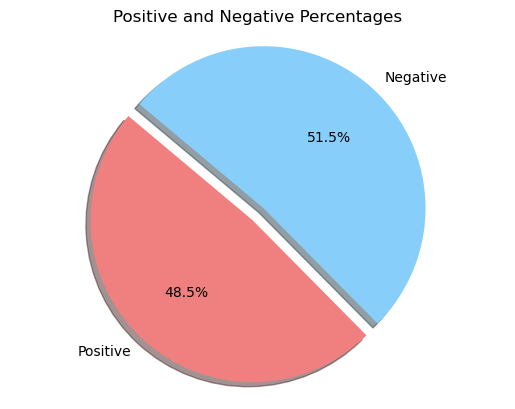

In [36]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Positive and Negative Percentages')
plt.show()

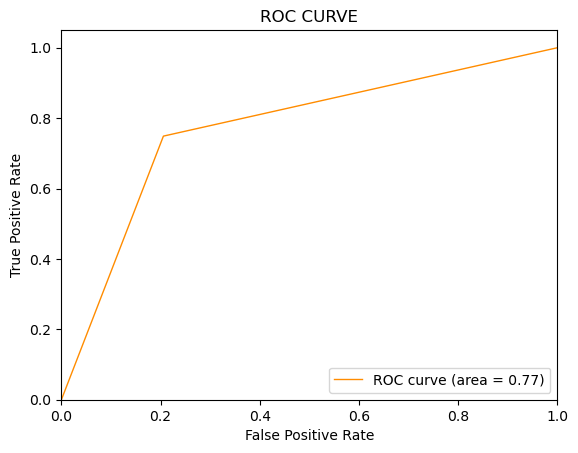

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_bnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## MultinomialNB Algorithm

In [39]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_nb=nb.predict(x_test)
tab_nb=confusion_matrix(y_test,pred_nb)
tab_nb
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78    159419
           1       0.79      0.74      0.76    160581

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [40]:
accuracy_score(y_test,pred_nb)*100

77.0184375

In [41]:
tn, fp, fn, tp = tab_nb.ravel()
positive_percent = tp / (tp + fn) * 100
negative_percent = tn / (tn + fp) * 100
labels = ['Positive', 'Negative']
sizes = [positive_percent, negative_percent]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

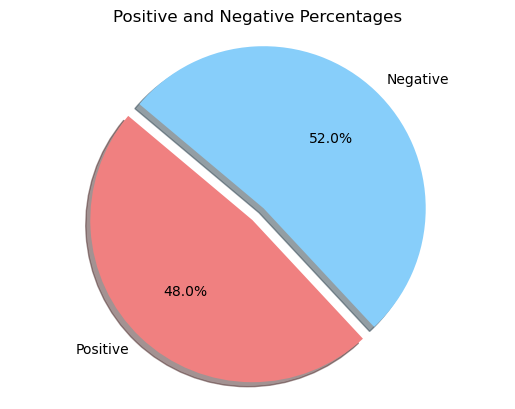

In [42]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Positive and Negative Percentages')
plt.show()

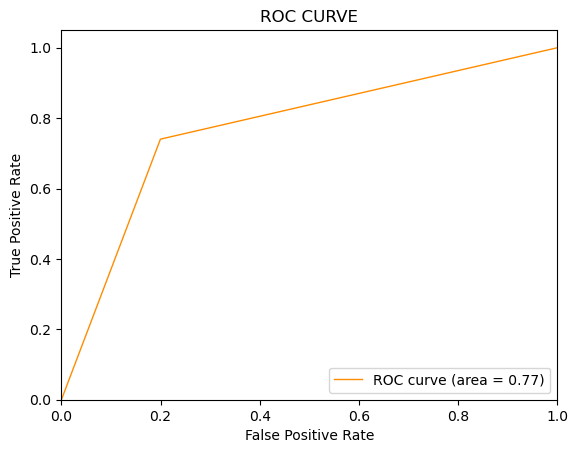

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## LogisticRegression Algorithm

In [44]:
log=LogisticRegression()
log.fit(x_train,y_train)
pred_log=log.predict(x_test)
tab_log=confusion_matrix(y_test,pred_log)
tab_log
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159419
           1       0.77      0.80      0.78    160581

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [45]:
accuracy_score(y_test,pred_log)*100

77.843125

In [46]:
tn, fp, fn, tp = tab_log.ravel()
positive_percent = tp / (tp + fn) * 100
negative_percent = tn / (tn + fp) * 100
labels = ['Positive', 'Negative']
sizes = [positive_percent, negative_percent]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

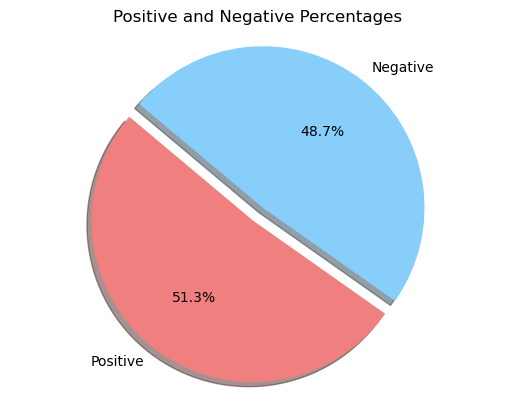

In [47]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Positive and Negative Percentages')
plt.show()

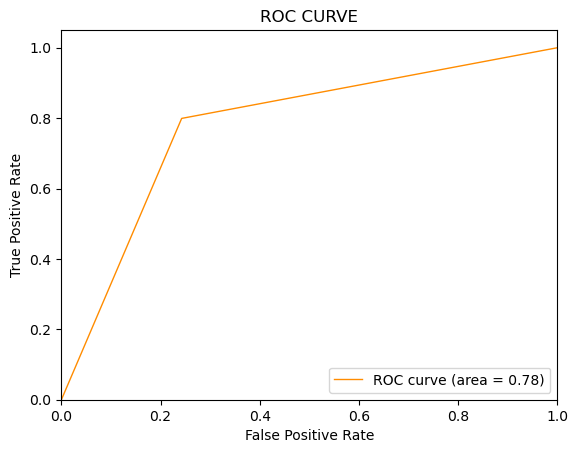

In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_log)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Conclusion

As we can see after trying out all the methods, we came up with 78% accuracy 

We hope through this article, you got a basic of how Sentimental Analysis is used to understand public emotions behind people’s tweets. As you’ve read in this article, Twitter Sentimental Analysis helps us preprocess the data (tweets) using different methods and feed it into ML models to give the best accuracy

### Key Takeaways

Twitter Sentimental Analysis is used to identify as well as classify the sentiments that are expressed in the text source.

Logistic Regression and Naive Bayes are some of the ML algorithms that can be used for Twitter Sentimental Analysis.